# **Heart Disease Prediction**

### **ML Algorithms: LR, RF, DT, NB, SVM, GB, MLP, KNN, XGBoost**

### **Import Libraries**

In [65]:
import pandas as pd #Read file
import numpy as np #Matrix multiplication
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report



from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

In [66]:
df = pd.read_csv('/content/heart.csv')

In [67]:
df.shape

(1025, 14)

In [68]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


**Info Of Dataset**

In [69]:
df.isnull().values.any() #IF there any null value reture True otherwise false

False

In [70]:
correlation=df.corr()
# correlation

<Axes: >

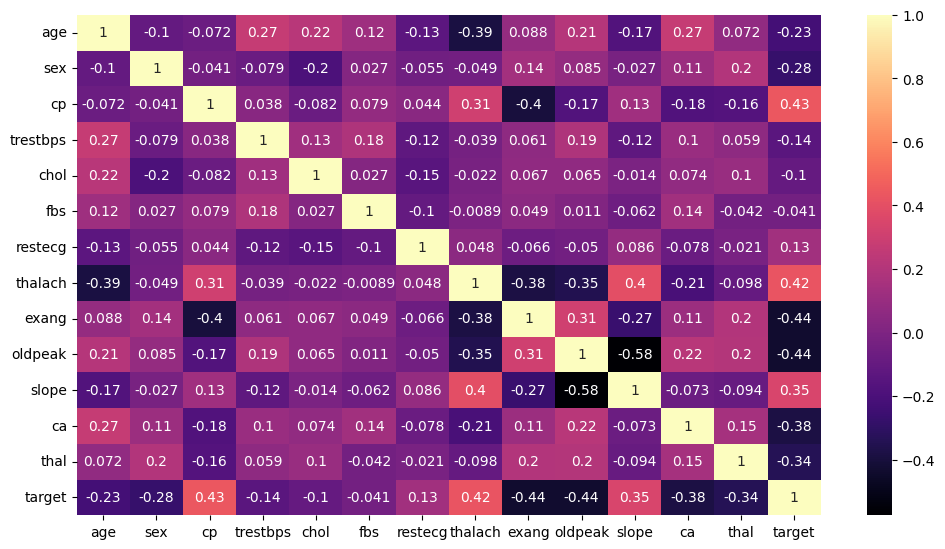

In [64]:
#heatmap
plt.figure(figsize=(12,6.5))
sns.heatmap(correlation, cmap="magma", annot=True)

In [71]:
gender_variable = 'sex'

# Calculate the number of male patients
male_patients = df[df[gender_variable] == 1].shape[0]
female_patients = df[df[gender_variable] == 0].shape[0]
print(f'Number of male patients: {male_patients}')
print(f'Number of female patients: {female_patients}')


target_variable = 'target'
healthy_patients = df[df[target_variable] == 0].shape[0]
print(f'Number of healthy patients: {healthy_patients}')
disease = 1025 - healthy_patients
print(f'Number of unhealhty: {disease}')



# Calculate the number of male healthy patients
male_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 1)].shape[0]
print(f'Number of male healthy patients: {male_healthy_patients}')

# Calculate the number of female healthy patients
female_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 0)].shape[0]
print(f'Number of female healthy patients: {female_healthy_patients}')


# Unhealthy patient male
male_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 1)].shape[0]
print(f'Male unhealthy (having heart disease) patients: {male_unhealthy_patients}')


# Calculate the number of female unhealthy patients
female_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 0)].shape[0]
print(f'Female unhealthy (having heart disease) patients: {female_unhealthy_patients}')

Number of male patients: 713
Number of female patients: 312
Number of healthy patients: 499
Number of unhealhty: 526
Number of male healthy patients: 413
Number of female healthy patients: 86
Male unhealthy (having heart disease) patients: 300
Female unhealthy (having heart disease) patients: 226


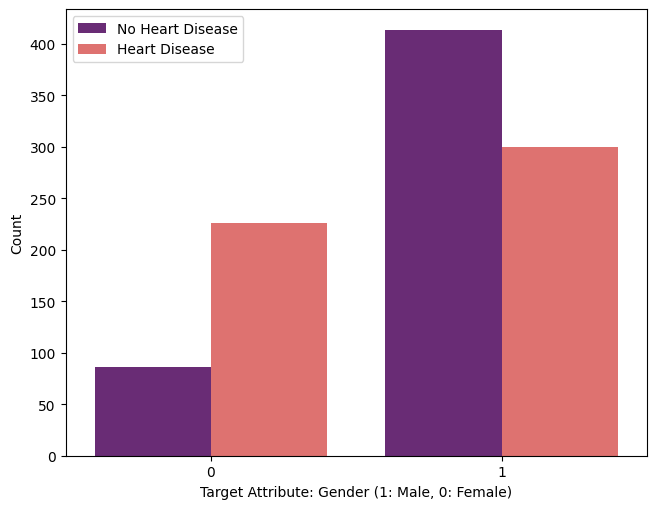

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'target'

# Assuming the gender variable is named 'gender' where 1 represents male
gender_variable = 'sex'

# Create a count plot to visualize the distribution of individuals with and without heart disease based on gender
plt.figure(figsize=(7.5, 5.8))
sns.countplot(x=gender_variable, hue=target_variable, data=df, palette='magma')
plt.xlabel('Target Attribute: Gender (1: Male, 0: Female)')
plt.ylabel('Count')
plt.legend( labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In [73]:
# normal attribute and class attribute feature alada korar jonno
x = df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [74]:
y = df.iloc[:,13]

In [75]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [76]:
# One will use for train and one will use for testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1 ,random_state= 1)

In [77]:
y_train.value_counts()

target
1    474
0    448
Name: count, dtype: int64

In [78]:
print(x.shape,x_train.shape,x_test.shape)

(1025, 13) (922, 13) (103, 13)


In [79]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

**RF**

In [80]:
param_grid_rf = {
'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [81]:
rf_pred = rf_clf.predict(x_test) # Make predictions on the test data

In [82]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.9514563106796117
Random Forest Precision: 0.9122807017543859
Random Forest Recall: 1.0
Random Forest F1 Score: 0.9541284403669724
Random Forest Confusion Matrix: [[46  5]
 [ 0 52]]


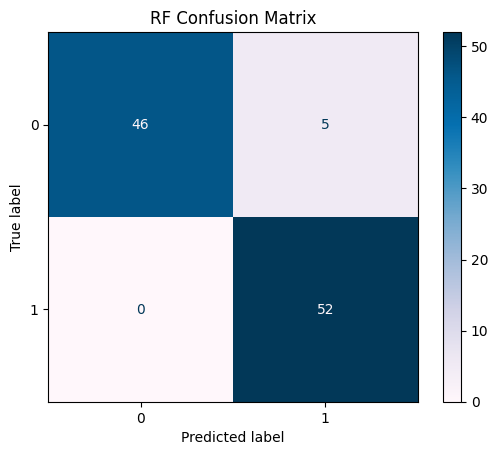

In [83]:
#confusion matrix using matplotlib
rf_cm = confusion_matrix(y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('RF Confusion Matrix')
plt.show()

**DT**

In [84]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [85]:
dc_pred = dc_clf.predict(x_test) # Make predictions on the test data

In [86]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.9029126213592233
Decision Tree Precision: 0.85
Decision Tree Recall: 0.9807692307692307
Decision Tree F1 Score: 0.9107142857142857
Decision Tree Confusion Matrix: [[42  9]
 [ 1 51]]


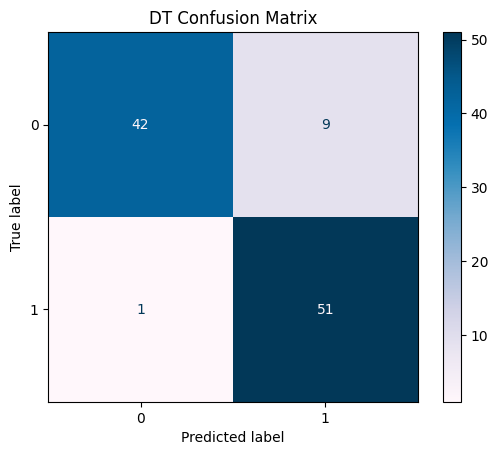

In [87]:
#confusion matrix using matplotlib
dc_cm = confusion_matrix(y_test,dc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=dc_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('DT Confusion Matrix')
plt.show()

**NB**

In [88]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [89]:
nb_pred = nb_clf.predict(x_test)

In [90]:
print("Naive Bayes Accuracy:",accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:",precision_score(y_test,nb_pred))
print("Naive Bayes Recall:",recall_score(y_test,nb_pred))
print("Naive Bayes F1 Score:",f1_score(y_test,nb_pred))
print("Naive Bayes Confusion Matrix:",confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.8058252427184466
Naive Bayes Precision: 0.7580645161290323
Naive Bayes Recall: 0.9038461538461539
Naive Bayes F1 Score: 0.8245614035087719
Naive Bayes Confusion Matrix: [[36 15]
 [ 5 47]]


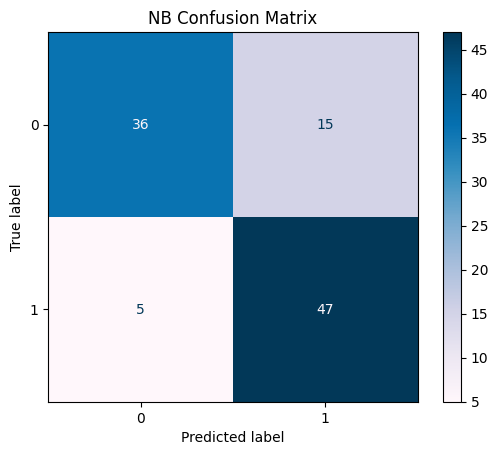

In [91]:
#confusion matrix using matplotlib
nb_cm = confusion_matrix(y_test,nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

**Logistic Regression**

In [92]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [93]:
# ans=model.predict(x_train)
# accuracy=accuracy_score(ans,y_train)
# precision=precision_score(ans,y_train)
# recall=recall_score(ans,y_train)
# f1=f1_score(ans,y_train)

In [94]:
# print("Training Accuracy is ",accuracy)
# print("Training Precisiom is ",precision)
# print("Training recall is ",recall)
# print("Training F1 is ",f1)

In [95]:
anss=model.predict(x_test)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)

print("Testing Accuracy is ",accuracy_test_lr)
print("Testing Precision is ",precision_test_lr)
print("Testing recall is ",recall_test_lr)
print("Testing F1 is ",f1_test_lr)
print("LR Confusion Matrix:",confusion_matrix(anss,y_test))

# print("LR Accuracy:",accuracy_score(y_test,anss))
# print("LR Precision:",precision_score(y_test,anss))
# print("LR Recall:",recall_score(y_test,anss))
# print("LR F1 Score:",f1_score(y_test,anss))
# print("LR Confusion Matrix:",confusion_matrix(y_test,anss))

Testing Accuracy is  0.8446601941747572
Testing Precision is  0.9230769230769231
Testing recall is  0.8
Testing F1 is  0.8571428571428571
LR Confusion Matrix: [[39  4]
 [12 48]]


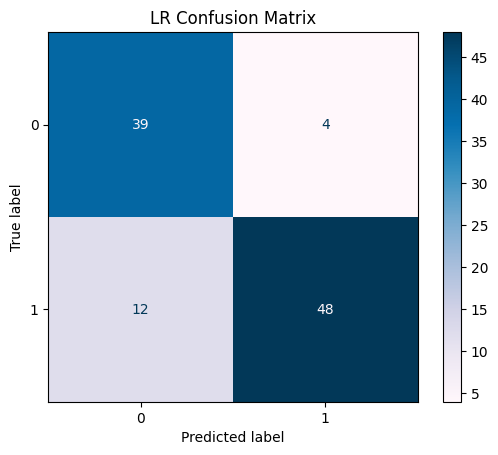

In [96]:
#confusion matrix using matplotlib
lr_cm = confusion_matrix(anss,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('LR Confusion Matrix')
plt.show()

**XGBoost**

In [97]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:57:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [98]:
# acc = model2.predict(x_train)
# accuracy_xgb=accuracy_score(acc,y_train)
# precision_xgb=precision_score(acc,y_train)
# recall_xgb=recall_score(acc,y_train)
# f1_xgb=f1_score(acc,y_train)

# print("Training Accuracy is ",accuracy_xgb)
# print("Training Precision is ",precision_xgb)
# print("Training recall is ",recall_xgb)
# print("Training F1 is ",f1_xgb)

In [99]:
acc2 = model2.predict(x_test)

In [100]:
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)
print("xgb Confusion Matrix:",confusion_matrix(acc2,y_test))

# print("xgb Accuracy:",accuracy_score(y_test,acc2))
# print("xgb Precision:",precision_score(y_test,acc2))
# print("xgb Recall:",recall_score(y_test,acc2))
# print("xgb F1 Score:",f1_score(y_test,acc2))
# print("xgb Confusion Matrix:",confusion_matrix(y_test,acc2))

Testing Accuracy is  0.9514563106796117
Testing Precision is  0.9807692307692307
Testing recall is  0.9272727272727272
Testing F1 is  0.9532710280373831
xgb Confusion Matrix: [[47  1]
 [ 4 51]]


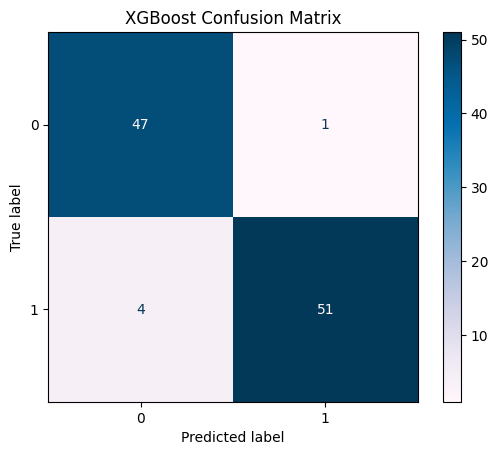

In [101]:
#confusion matrix using matplotlib
xgb_cm = confusion_matrix(acc2,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=model2.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

# MLPClassifier

In [102]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [103]:
# y_pred = model3.predict(x_train)
# acc_mlp  = accuracy_score(y_pred,y_train)
# precision_mlp=precision_score(y_pred,y_train)
# recall_mlp=recall_score(y_pred,y_train)
# f1_mlp=f1_score(y_pred,y_train)
# print("Traing Accuracy is ",acc_mlp)
# print("Traing Precision is ",precision_mlp)
# print("Traing recall is ",recall_mlp)
# print("Traing F1 is ",f1_mlp)

In [104]:
y_pred_t = model3.predict(x_test)
acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)
mlp_cm = confusion_matrix(y_pred_t,y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)
print("MLP Confusion Matrix",mlp_cm)


Testing Accuracy is  0.9514563106796117
Testing Precision is  0.9807692307692307
Testing recall is  0.9272727272727272
Testing F1 is  0.9532710280373831
MLP Confusion Matrix [[47  1]
 [ 4 51]]


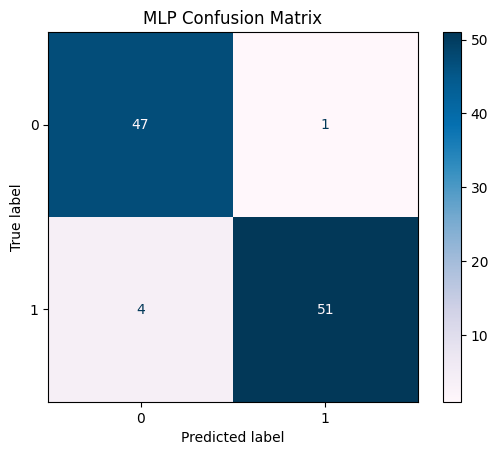

In [105]:
#confusion matrix using matplotlib
mlp_cm = confusion_matrix(y_pred_t,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=model3.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('MLP Confusion Matrix')
plt.show()

**SVM**

In [106]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2, probability=True)
classifier.fit(x_train,y_train)

Y_predict = classifier.predict(x_test)

In [107]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Forest Recall:",recall_score(y_test,Y_predict))
print("SVM Forest F1 Score:",f1_score(y_test,Y_predict))
print("SVM Confusion Matrix:",confusion_matrix(y_test,Y_predict))

SVM Accuracy: 0.8349514563106796
SVM Precision: 0.7692307692307693
SVM Forest Recall: 0.9615384615384616
SVM Forest F1 Score: 0.8547008547008548
SVM Confusion Matrix: [[36 15]
 [ 2 50]]


In [108]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,Y_predict)
svm_cm

array([[36, 15],
       [ 2, 50]])

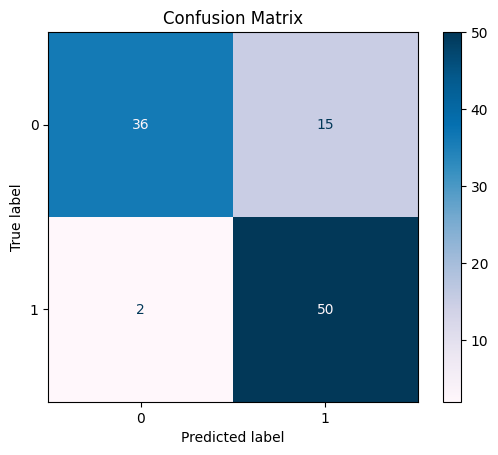

In [109]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# KNN


In [110]:
#When K = 5

#KNN MODEL building

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train,y_train)


#prediction

Y_predk = knn_classifier.predict(x_test)

print("KNN Accuracy:",accuracy_score(y_test,Y_predk))
print("KNN Precision:",precision_score(y_test,Y_predk))
print("KNN Recall:",recall_score(y_test,Y_predk))
print("KNN F1 Score:",f1_score(y_test,Y_predk))
print("KNN Confusion matrix:",confusion_matrix(y_test,Y_predk))

KNN Accuracy: 0.9029126213592233
KNN Precision: 0.875
KNN Recall: 0.9423076923076923
KNN F1 Score: 0.9074074074074073
KNN Confusion matrix: [[44  7]
 [ 3 49]]


In [111]:
knn_cm = confusion_matrix(y_test,Y_predk)
knn_cm

array([[44,  7],
       [ 3, 49]])

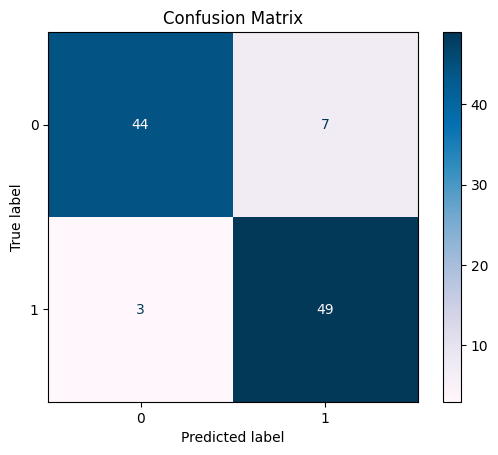

In [112]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

**GB Classifier implementation**

In [113]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [30],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [114]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test)

In [115]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

GB Accuracy: 0.883495145631068
GB Precision: 0.8225806451612904
GB Forest Recall: 0.9807692307692307
GB Forest F1 Score: 0.8947368421052632


In [116]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

array([[40, 11],
       [ 1, 51]])

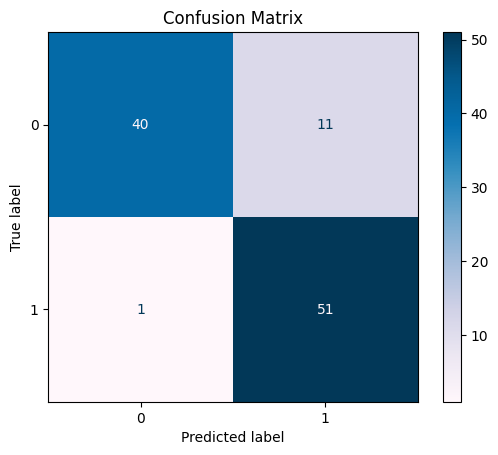

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [118]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
    accuracy_score(anss,y_test),
    accuracy_score(y_test,rf_pred),
    accuracy_score(y_test,nb_pred),
    accuracy_score(y_test,dc_pred),
   accuracy_score(y_test, Y_predict),
   accuracy_score(y_test, Y_predk),
   accuracy_score(y_test, Y_pred2),
  accuracy_score(y_pred_t,y_test),
  accuracy_score(acc2,y_test)
                                                                                 ]})


In [119]:
final_data

,Models,ACC
0,LR,0.844660
1,RF,0.951456
2,NB,0.805825
3,DT,0.902913
4,SVM,0.834951
5,KNN,0.902913
6,GB,0.883495
7,MLP,0.951456
8,XGB,0.951456


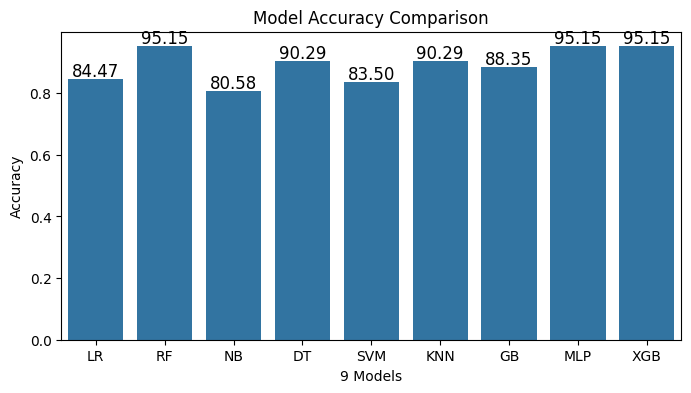

In [120]:
# Plotting the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('9 Models')
plt.ylabel('Accuracy')
for index, row in final_data.iterrows():
    plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
plt.show()

In [121]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [122]:
y_pred_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f'RF AUC: {auc_roc_rf}')

RF AUC: 0.9992458521870287


In [123]:
# Make predictions on the test set

y_pred_prob_dt = dc_clf.predict_proba(x_test)[:, 1]
y_pred_prob_nb = nb_clf.predict_proba(x_test)[:, 1]
y_pred_prob_lr = model.predict_proba(x_test)[:, 1]
y_pred_prob_xgb = model2.predict_proba(x_test)[:, 1]
y_pred_prob_mlp = model3.predict_proba(x_test)[:, 1]
y_pred_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]
y_pred_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC score

auc_roc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_roc_nb = roc_auc_score(y_test, y_pred_prob_nb)
auc_roc_LR = roc_auc_score(y_test, y_pred_prob_lr)
auc_roc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
auc_roc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
auc_roc_knn = roc_auc_score(y_test, y_pred_prob_knn)
auc_roc_gb = roc_auc_score(y_test, y_pred_prob_gb)


print(f'DT AUC: {auc_roc_dt}')
print(f'NB AUC: {auc_roc_nb}')
print(f'LR AUC: {auc_roc_LR}')
print(f'XGB AUC: {auc_roc_xgb}')
print(f'MLP AUC: {auc_roc_mlp}')
print(f'KNN AUC: {auc_roc_knn}')
print(f'GB AUC: {auc_roc_gb}')


DT AUC: 0.9645550527903469
NB AUC: 0.9098793363499245
LR AUC: 0.9340120663650076
XGB AUC: 0.9924585218702865
MLP AUC: 0.9943438914027148
KNN AUC: 0.9807692307692308
GB AUC: 0.9592760180995474


In [124]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y_pred_prob_svm = classifier.predict_proba(x_test)[:, 1]
auc_roc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f'SVM AUC: {auc_roc_svm}')

SVM AUC: 0.9317496229260935


# **ROC Curve**

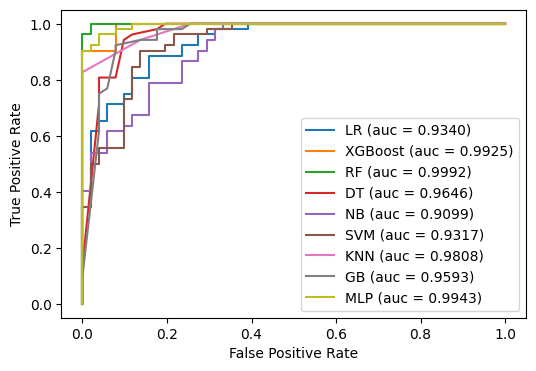

LR AUC: 0.9340
XGB AUC: 0.9925
RF AUC: 0.9992
DT AUC: 0.9646
NB AUC: 0.9099
SVM AUC: 0.9317
KNN AUC: 0.9808
GB AUC: 0.9593
MLP AUC: 0.9943


In [125]:
#ROC
# LR
y_prob_lr = model.predict_proba(x_test)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# XGBoost
y_prob_xgb = model2.predict_proba(x_test)[:, 1]
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# RF
y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(rf_fpr, rf_tpr)

# DT
y_prob_dt = dc_clf.predict_proba(x_test)[:, 1]
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)


# NB
y_prob_nb = nb_clf.predict_proba(x_test)[:, 1]
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(nb_fpr, nb_tpr)

# SVM
y_prob_svm = classifier.predict_proba(x_test)[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(svm_fpr, svm_tpr)

# KNN
y_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(knn_fpr, knn_tpr)

# GB
y_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(gb_fpr, gb_tpr)

# MLP
y_prob_mlp = model3.predict_proba(x_test)[:, 1]
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# RF
# y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
# rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
# roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.4f)' % roc_auc_lr)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.4f)' % roc_auc_xgb)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.4f)' % roc_auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.4f)' % roc_auc_dt)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='NB (auc = %0.4f)' % roc_auc_nb)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.4f)' % roc_auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.4f)' % roc_auc_knn)
plt.plot(gb_fpr, gb_tpr, linestyle='-', label='GB (auc = %0.4f)' % roc_auc_gb)
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (auc = %0.4f)' % roc_auc_mlp)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('LR AUC: {:.4f}'.format(roc_auc_lr))
print('XGB AUC: {:.4f}'.format(roc_auc_xgb))
print('RF AUC: {:.4f}'.format(roc_auc_rf))
print('DT AUC: {:.4f}'.format(roc_auc_dt))
print('NB AUC: {:.4f}'.format(roc_auc_nb))
print('SVM AUC: {:.4f}'.format(roc_auc_svm))
print('KNN AUC: {:.4f}'.format(roc_auc_knn))
print('GB AUC: {:.4f}'.format(roc_auc_gb))
print('MLP AUC: {:.4f}'.format(auc_roc_mlp))
